In [1]:
import sys
sys.path.append("..")
sys.path.append("../src")
from data_augmentation import *
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds
from util import *
import tqdm 
import matplotlib.pyplot as plt
DATA_PATH = "../../Fluke_Data/"
import imageio as io
import  matplotlib.pyplot as plt
import cv2
import seaborn

In [2]:
inputs = [a.split(",") for a in open(DATA_PATH + "croppings.txt").read().splitlines()]
ids = [a[0] for a in inputs]
corners_x =  [[int(c) for c in a[1::2]] for a in inputs]
corners_y = [[int(c) for c in a[2::2]] for a in inputs]
bounding_box_corners = [[min(x),max(x),min(y),max(y)] for x,y in zip(corners_x,corners_y)]

In [3]:
df = pd.DataFrame()
df["Image"]= ids
df["box_corners"] = bounding_box_corners
df

,Image,box_corners
0,88532e70.jpg,"[195, 888, 115, 546]"
1,0c88a7aa.jpg,"[125, 808, 19, 390]"
2,1442f41d.jpg,"[19, 652, 13, 276]"
3,1b5f7f86.jpg,"[109, 933, 298, 494]"
4,2cb0e816.jpg,"[38, 990, 193, 484]"
...,...,...
1195,04ce734a.jpg,"[62, 949, 178, 450]"
1196,04b3714e.jpg,"[15, 1041, 17, 362]"
1197,0365b421.jpg,"[28, 1023, 189, 422]"
1198,01e490cf.jpg,"[13, 963, 68, 512]"


In [4]:
def draw_box(image):
    img = io.imread(DATA_PATH + "train/"+image)
    min_x,max_x, min_y ,max_y = df[df["Image"]==image].values[0,1]
    if len(img.shape)==2:
        return cv2.rectangle(img,(min_x,min_y),(max_x,max_y),0,5)
    
    return cv2.rectangle(img,(min_x,min_y),(max_x,max_y),(255,0,0),5)

In [5]:
drawings = [draw_box(i) for i in df["Image"]]

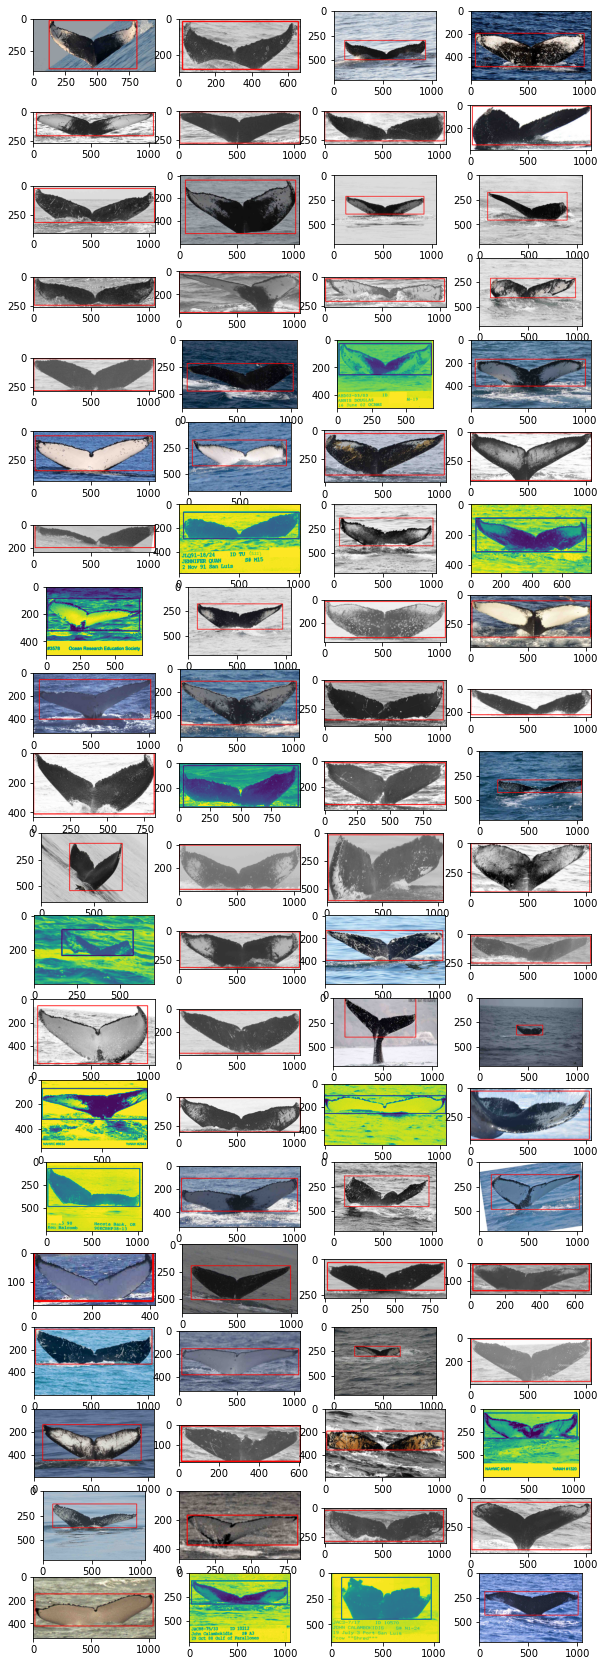

In [6]:
fig = plt.figure(figsize=(10, 30))
columns = 4
rows = 20
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(drawings[i])
plt.show()

In [7]:
def resize_img(image,shape,box):
    img = io.imread(DATA_PATH + "train/"+image)
    
    if len(img.shape)==3:
        sy,sx = img.shape[0],img.shape[1]
    else:
        sy,sx = img.shape[0],img.shape[1]
    box[2]*=shape/sy
    box[3]*=shape/sy
    box[0]*=shape/sx
    box[1]*=shape/sx
    
    box = [int(c) for c in box]
    
    img = cv2.resize(img,(shape,shape))
        
    if len(img.shape)==2:
        return cv2.rectangle(img,(box[0],box[2]),(box[1],box[3]),0,2),box
    
    return cv2.rectangle(img,(box[0],box[2]),(box[1],box[3]),(255,0,0),2),box

In [8]:
drawings_rectangle = [resize_img(path,244,box)[0] for path,box in zip(df["Image"],df["box_corners"])]

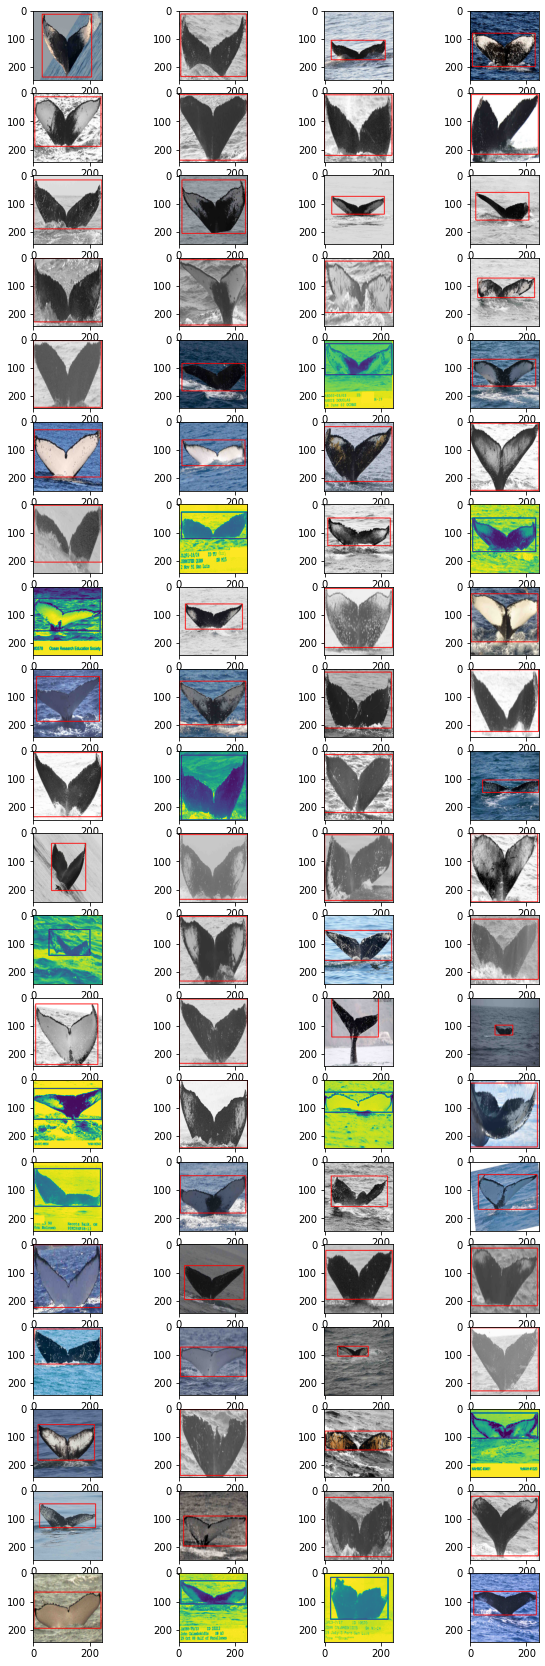

In [9]:
fig = plt.figure(figsize=(10, 30))
columns = 4
rows = 20
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(drawings_rectangle[i])
plt.show()

In [10]:
def prepare_rectangle(image,shape,box):
    img = io.imread(DATA_PATH + "train/"+image)
    
    if len(img.shape)==3:
        sy,sx = img.shape[0],img.shape[1]
    else:
        sy,sx = img.shape[0],img.shape[1]
    box[2]*=shape/sy
    box[3]*=shape/sy
    box[0]*=shape/sx
    box[1]*=shape/sx
    box = [int(c) for c in box]
    return box

In [11]:
[prepare_rectangle(path,244,box) for path,box in zip(df["Image"],df["box_corners"])]

[[10, 47, 13, 66],
 [8, 53, 6, 140],
 [2, 87, 9, 194],
 [5, 50, 36, 60],
 [2, 53, 31, 80],
 [1, 55, 12, 171],
 [0, 56, 4, 205],
 [0, 55, 5, 190],
 [1, 56, 3, 137],
 [0, 56, 10, 113],
 [2, 54, 7, 84],
 [6, 49, 26, 48],
 [4, 48, 21, 55],
 [0, 56, 4, 210],
 [0, 55, 6, 164],
 [0, 55, 13, 185],
 [6, 53, 26, 50],
 [0, 56, 4, 207],
 [2, 54, 33, 71],
 [1, 84, 7, 61],
 [1, 54, 28, 67],
 [0, 55, 15, 109],
 [2, 57, 23, 57],
 [0, 55, 8, 114],
 [0, 56, 2, 140],
 [0, 56, 4, 210],
 [2, 57, 12, 52],
 [3, 54, 17, 51],
 [3, 71, 26, 91],
 [1, 82, 21, 77],
 [5, 52, 21, 53],
 [0, 56, 5, 146],
 [0, 55, 14, 107],
 [2, 54, 14, 87],
 [0, 55, 18, 81],
 [0, 55, 8, 127],
 [0, 56, 6, 219],
 [0, 72, 2, 130],
 [2, 59, 9, 166],
 [0, 63, 8, 141],
 [10, 56, 35, 51],
 [16, 45, 13, 76],
 [0, 56, 3, 143],
 [0, 56, 2, 94],
 [0, 55, 1, 142],
 [19, 70, 31, 87],
 [0, 55, 4, 174],
 [0, 55, 22, 65],
 [0, 56, 13, 207],
 [2, 53, 10, 103],
 [0, 56, 4, 143],
 [6, 44, 0, 49],
 [20, 35, 34, 46],
 [0, 67, 14, 61],
 [0, 56, 3, 196],
 [